# OPCO M 4 - Brief 0 : Boston Housing regression

In [155]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Chargement des données et analyse de consistance

In [156]:
use_uncleaned_dataset = False
if use_uncleaned_dataset:
    df = pd.read_csv('data/BostonHousing.csv')
else:
    df = pd.read_csv('data/BostonHousingClean.csv')


In [157]:
df.describe()

,crim,zn,indus,chas,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [158]:
print(df.shape)

(506, 12)


features : crim, zn, indus, chas, nox, rm, age, dis, rad, tas, ptratio, b; lstat

target : medv

## Preparation des données

### Split

20 % de donnée pour le set, seed fix à 67 pour la reproductabilité

In [159]:
# Séparation features / target
X = df.drop(columns=['medv'])
y = df['medv']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

### Normalisation des données

Faites avec StandardScaler

* fit et transform sur le jeu de train (petit rappel, le fit est le calcul des paramètre de normalisation appliqué au données fournis, basé sur les données elle même)
* transform sur le jeu de train, les paramètres de normalisations ont été déterminés lors du fit de l'étape précédente.



In [160]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Remarque : pourquoi ne pas faire
```python
scaler = StandardScaler()
df = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df, test_size=0.2, random_state=67)
```

La réponse est que dans ce cas, on fit le dataset sur l'ensembles des données, données de train ET de test. Ainsi le model connait les réponses lors du cycle d'évaluation lors du training.

Ce qui induit que les performances peuvent peux-être artificiellement plus élevé que la réalité, ce qui conduit a un model non fiable alors qu'on peux penser le contraire.

Ce phénomène de pollution est appelé 'fuite de données' ou 'data leak'

Résumé :

|                | Bonne Approche                                                            | Approche avec Fuite de Données                                                 |
|:---------------|:--------------------------------------------------------------------------|:-------------------------------------------------------------------------------|
| Séparation     | On sépare les données train et test en premier.                           | On normalise d'abord.                                                          |
| Apprentissage	 | Le scaler apprend les statistiques uniquement sur X_train.                | Le scaler apprend les statistiques sur tout le dataset.                        |
| Transformation | On applique la même transformation à X_train et X_test.                   | La transformation a déjà eu lieu sur tout le dataset.                          |
| Résultat       | Le test simule des conditions réelles. L'évaluation du modèle est fiable. | Le test est "contaminé". L'évaluation du modèle est biaisée et trop optimiste. |




## Regression linéaire

### Training

In [161]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predict

In [162]:
y_pred = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score :", r2_score(y_test, y_pred))

MAE : 3.444023988455771
MSE : 20.676380349553238
RMSE : 4.547128802832974
R² score : 0.6039476363518884


**Pour info les performance sur le dataset brute sont les suivante.**

```
MAE : 3.1733774704803994
MSE : 17.892660005347324
RMSE : 4.22997163174262
R² score : 0.6572693011413403
```


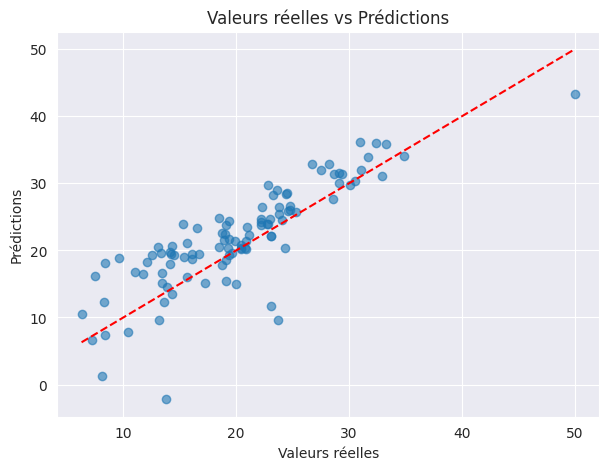

In [163]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

## Regression random forest

### Training

In [164]:
model = RandomForestRegressor(random_state=67)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Predict

In [165]:
y_pred = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score :", r2_score(y_test, y_pred))

MAE : 1.9689901960784326
MSE : 6.864642382352946
RMSE : 2.6200462557659066
R² score : 0.8685090042276847


**Pour info les performance sur le dataset brute sont les suivante.**

```
MAE : 1.8055980392156876
MSE : 5.545327009803924
RMSE : 2.3548518020894487
R² score : 0.8937802539755458
```

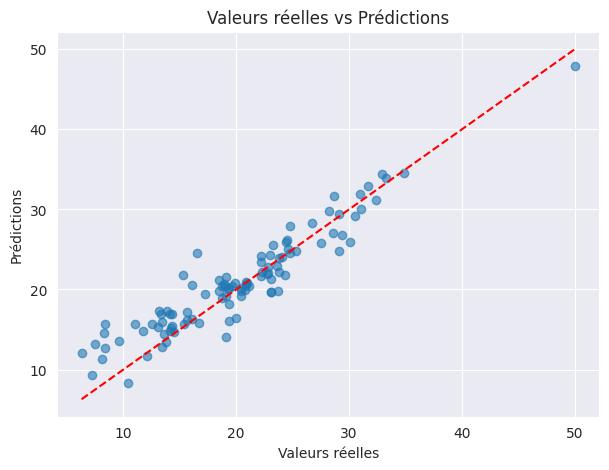

In [166]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

## Regression LightGBM

In [167]:
# on resplit pour partir sur des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

lgbm_reg = lgb.LGBMRegressor(
    objective='regression_l1', # MAE
    metric='mae',
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42
)


In [168]:
lgbm_reg.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='mae',
    callbacks=[lgb.early_stopping(50)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 11
[LightGBM] [Info] Start training from score 21.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,1000
,subsample_for_bin,200000
,objective,'regression_l1'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [169]:
y_pred = lgbm_reg.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score :", r2_score(y_test, y_pred))

MAE : 2.0921886678464205
MSE : 7.491149089198977
RMSE : 2.736996362657243
R² score : 0.8565083804292776


**Pour info les performance sur le dataset brute sont les suivante.**

```
MAE : 1.7818943307875403
MSE : 5.670587415137568
RMSE : 2.3812995223485784
R² score : 0.8913809133382964
```

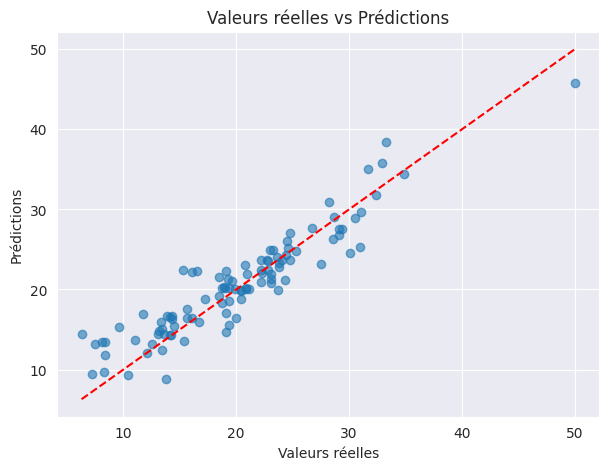

In [170]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

# Conclusion

## Observation sur les models

Le model entrainé s'accorde plutot bien avec les données réelles.

Le model le plus performant semble être la regression 'random forest' et la moins performance la régression linéaire.

La regression linéaire a plus de difficulté a regroupé les points

## Observation sur les modification du dataset.

On constate une degradation de la précision du model, cependant les choix éthiques est justifié même si celui-ci abaisse le R²

Concernant l'élimination du nox, cette suppression de feature est artificiel dans le cadre de cet exercice.

Dans un cas réel, constatant une baisse de performance lors de l'entrainement, on décidera de le réintégrer dans les features.